<a href="https://colab.research.google.com/github/KarizYa/tugas3PCD/blob/main/PCD_Domain_Frekuensi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Rizka Annisa | F551 22 003 | TI A**

**A.	FFT (Fast Fourier Transform)**

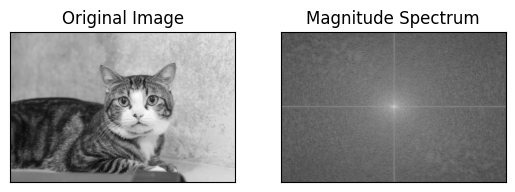

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

image_path = '/content/kucing.jpg'

image = cv2.imread(image_path, 0)

# Lakukan transformasi FFT
f_transform = np.fft.fft2(image)
f_transform_shifted = np.fft.fftshift(f_transform)
magnitude_spectrum = 20 * np.log(np.abs(f_transform_shifted))

# Tampilkan Gambar
plt.subplot(121), plt.imshow(image, cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()


**B. DFT (Diskrit Fourier Transformation)**

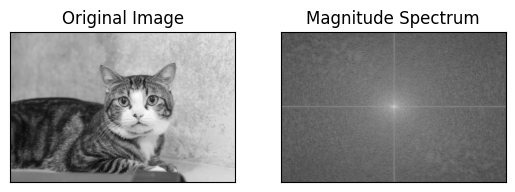

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

image_path = '/content/kucing.jpg'

image = cv2.imread(image_path, 0)

# Lakukan transformasi DFT
dft = np.fft.fft2(image)
magnitude_spectrum = 20 * np.log(np.abs(np.fft.fftshift(dft)))

# Tampilkan gambar
plt.subplot(121), plt.imshow(image, cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()


**C.	Ideal Lowpass Filter dan Butterworth Lowpass Filter**

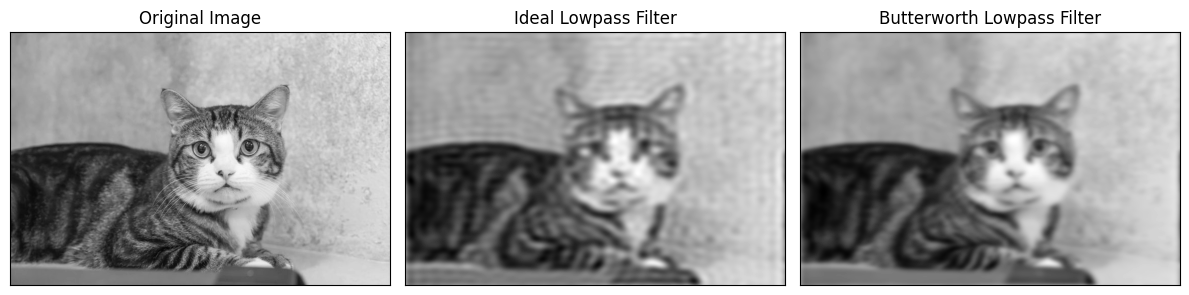

In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def ideal_lowpass_filter(shape, cutoff):
    rows, cols = shape
    center_row, center_col = rows // 2, cols // 2
    mask = np.zeros((rows, cols), np.uint8)
    for i in range(rows):
        for j in range(cols):
            distance = np.sqrt((i - center_row) ** 2 + (j - center_col) ** 2)
            if distance <= cutoff:
                mask[i, j] = 1
    return mask

def butterworth_lowpass_filter(shape, cutoff, n):
    rows, cols = shape
    center_row, center_col = rows // 2, cols // 2
    mask = np.zeros((rows, cols), np.float32)
    for i in range(rows):
        for j in range(cols):
            distance = np.sqrt((i - center_row) ** 2 + (j - center_col) ** 2)
            mask[i, j] = 1 / (1 + (distance / cutoff) ** (2 * n))
    return mask

image_path = '/content/kucing.jpg'

image = cv2.imread(image_path, 0)
rows, cols = image.shape

# Transformasi Fourier
f_transform = np.fft.fft2(image)
f_shifted = np.fft.fftshift(f_transform)

# Filter Ideal Lowpass
cutoff_frequency = 30
ideal_lp_mask = ideal_lowpass_filter(f_shifted.shape, cutoff_frequency)
f_ideal_lp = f_shifted * ideal_lp_mask
f_ideal_lp_shifted = np.fft.ifftshift(f_ideal_lp)
image_ideal_lp = np.fft.ifft2(f_ideal_lp_shifted).real

# Filter Butterworth Lowpass
cutoff_frequency_bw = 30
n = 2
butterworth_lp_mask = butterworth_lowpass_filter(f_shifted.shape,
                                                 cutoff_frequency_bw, n)
f_butterworth_lp = f_shifted * butterworth_lp_mask
f_butterworth_lp_shifted = np.fft.ifftshift(f_butterworth_lp)
image_butterworth_lp = np.fft.ifft2(f_butterworth_lp_shifted).real

# Tampilkan gambar
plt.figure(figsize=(12, 4))

plt.subplot(131)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.xticks([])
plt.yticks([])

plt.subplot(132)
plt.imshow(image_ideal_lp, cmap='gray')
plt.title('Ideal Lowpass Filter')
plt.xticks([])
plt.yticks([])

plt.subplot(133)
plt.imshow(image_butterworth_lp, cmap='gray')
plt.title('Butterworth Lowpass Filter')
plt.xticks([])
plt.yticks([])

plt.tight_layout()
plt.show()


**D.	Gaussian Lowpass Filter dan Ideal Highpass Filter**

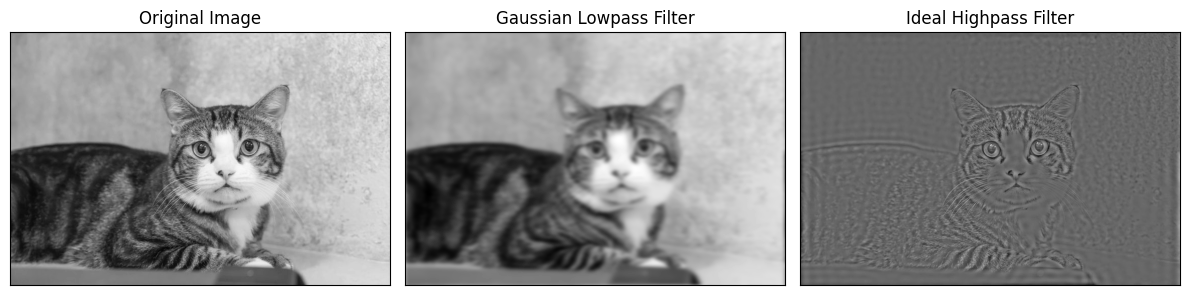

In [4]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def gaussian_lowpass_filter(shape, cutoff):
    rows, cols = shape
    center_row, center_col = rows // 2, cols // 2
    mask = np.zeros((rows, cols), np.float32)
    for i in range(rows):
        for j in range(cols):
            distance = np.sqrt((i - center_row) ** 2 + (j - center_col) ** 2)
            mask[i, j] = np.exp(-(distance ** 2) / (2 * (cutoff ** 2)))
    return mask

def ideal_highpass_filter(shape, cutoff):
    rows, cols = shape
    center_row, center_col = rows // 2, cols // 2
    mask = np.ones((rows, cols), np.float32)
    for i in range(rows):
        for j in range(cols):
            distance = np.sqrt((i - center_row) ** 2 + (j - center_col) ** 2)
            if distance <= cutoff:
                mask[i, j] = 0
    return mask

image_path = '/content/kucing.jpg'

image = cv2.imread(image_path, 0)
rows, cols = image.shape

# Transformasi Fourier
f_transform = np.fft.fft2(image)
f_shifted = np.fft.fftshift(f_transform)

# Filter Gaussian Lowpass
cutoff_frequency_gaussian = 30
gaussian_lp_mask = gaussian_lowpass_filter(f_shifted.shape,
                                           cutoff_frequency_gaussian)
f_gaussian_lp = f_shifted * gaussian_lp_mask
f_gaussian_lp_shifted = np.fft.ifftshift(f_gaussian_lp)
image_gaussian_lp = np.fft.ifft2(f_gaussian_lp_shifted).real

# Filter Ideal Highpass
cutoff_frequency_ideal = 30
ideal_hp_mask = ideal_highpass_filter(f_shifted.shape, cutoff_frequency_ideal)
f_ideal_hp = f_shifted * ideal_hp_mask
f_ideal_hp_shifted = np.fft.ifftshift(f_ideal_hp)
image_ideal_hp = np.fft.ifft2(f_ideal_hp_shifted).real

# Tampilkan hasil
plt.figure(figsize=(12, 4))

plt.subplot(131)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.xticks([])
plt.yticks([])

plt.subplot(132)
plt.imshow(image_gaussian_lp, cmap='gray')
plt.title('Gaussian Lowpass Filter')
plt.xticks([])
plt.yticks([])

plt.subplot(133)
plt.imshow(image_ideal_hp, cmap='gray')
plt.title('Ideal Highpass Filter')
plt.xticks([])
plt.yticks([])

plt.tight_layout()
plt.show()


**E.	Butterworth Highpass Filter dan Gaussian Highpass Filter**

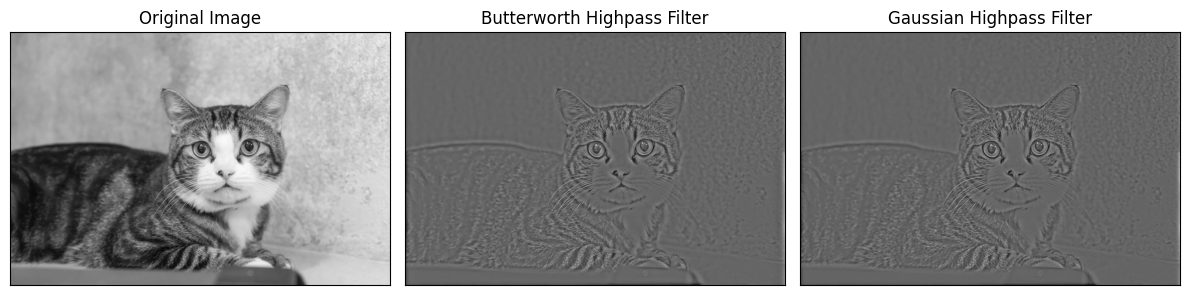

In [5]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def butterworth_highpass_filter(shape, cutoff, n):
    rows, cols = shape
    center_row, center_col = rows // 2, cols // 2
    mask = np.zeros((rows, cols), np.float32)
    for i in range(rows):
        for j in range(cols):
            distance = np.sqrt((i - center_row) ** 2 + (j - center_col) ** 2)
            if distance == 0:
                mask[i, j] = 0
            else:
                mask[i, j] = 1 / (1 + (cutoff / distance) ** (2 * n))
    return mask

def gaussian_highpass_filter(shape, cutoff):
    rows, cols = shape
    center_row, center_col = rows // 2, cols // 2
    mask = np.zeros((rows, cols), np.float32)
    for i in range(rows):
        for j in range(cols):
            distance = np.sqrt((i - center_row) ** 2 + (j - center_col) ** 2)
            mask[i, j] = 1 - np.exp(-(distance ** 2) / (2 * (cutoff ** 2)))
    return mask

image_path = '/content/kucing.jpg'

image = cv2.imread(image_path, 0)
rows, cols = image.shape

# Transformasi Fourier
f_transform = np.fft.fft2(image)
f_shifted = np.fft.fftshift(f_transform)

# Filter Butterworth Highpass
cutoff_frequency_butterworth = 30
n_butterworth = 2
butterworth_hp_mask = butterworth_highpass_filter(f_shifted.shape,
                                                  cutoff_frequency_butterworth,
                                                  n_butterworth)
f_butterworth_hp = f_shifted * butterworth_hp_mask
f_butterworth_hp_shifted = np.fft.ifftshift(f_butterworth_hp)
image_butterworth_hp = np.fft.ifft2(f_butterworth_hp_shifted).real

# Filter Gaussian Highpass
cutoff_frequency_gaussian = 30
gaussian_hp_mask = gaussian_highpass_filter(f_shifted.shape,
                                            cutoff_frequency_gaussian)
f_gaussian_hp = f_shifted * gaussian_hp_mask
f_gaussian_hp_shifted = np.fft.ifftshift(f_gaussian_hp)
image_gaussian_hp = np.fft.ifft2(f_gaussian_hp_shifted).real

# Tampilkan hasil
plt.figure(figsize=(12, 4))

plt.subplot(131)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.xticks([])
plt.yticks([])

plt.subplot(132)
plt.imshow(image_butterworth_hp, cmap='gray')
plt.title('Butterworth Highpass Filter')
plt.xticks([])
plt.yticks([])

plt.subplot(133)
plt.imshow(image_gaussian_hp, cmap='gray')
plt.title('Gaussian Highpass Filter')
plt.xticks([])
plt.yticks([])

plt.tight_layout()
plt.show()


**F.	Filter Unsharp Masking, Filter Laplacian Domain Frekuensi, dan Selective Filtering**

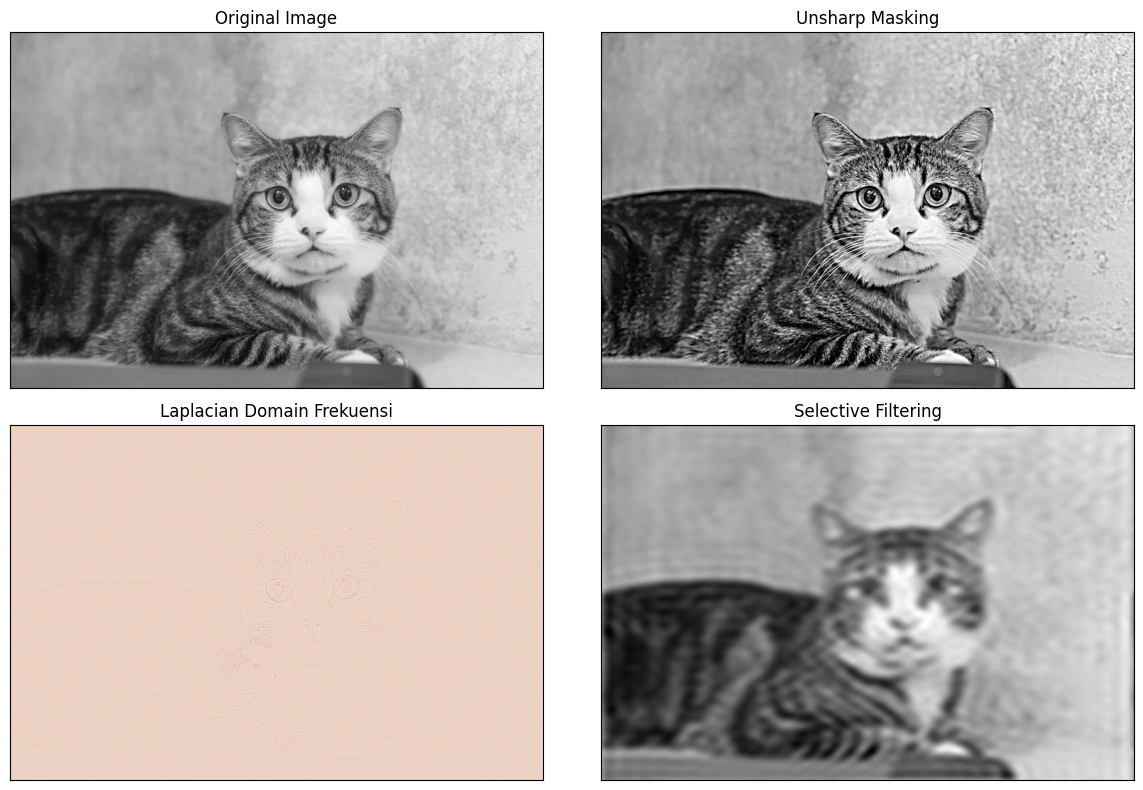

In [6]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def unsharp_masking(image, alpha, sigma):
    blurred = cv2.GaussianBlur(image, (0, 0), sigma)
    sharpened = cv2.addWeighted(image, 1 + alpha, blurred, -alpha, 0)
    return sharpened

def laplacian_filter(image):
    laplacian = cv2.Laplacian(image, cv2.CV_64F)
    laplacian = cv2.normalize(laplacian, None, 0, 255, cv2.NORM_MINMAX,
                              cv2.CV_8U)
    return laplacian

def selective_filtering(image, mask):
    filtered = np.fft.fftshift(np.fft.fft2(image)) * mask
    filtered = np.fft.ifft2(np.fft.ifftshift(filtered)).real
    return filtered

image_path = '/content/kucing.jpg'

image = cv2.imread(image_path, 0)

# Filter Unsharp Masking
alpha = 1.5
sigma = 3
unsharp_masked = unsharp_masking(image, alpha, sigma)

# Filter Laplacian Domain Frekuensi
laplacian = laplacian_filter(image)

# Filter Selective Filtering
rows, cols = image.shape
mask = np.zeros((rows, cols), dtype=np.float32)
mask[rows//2 - 30:rows//2 + 30, cols//2 - 30:cols//2 + 30] = 1
selective_filtered = selective_filtering(image, mask)

# Tampilkan hasil
plt.figure(figsize=(12, 8))

plt.subplot(221)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.xticks([])
plt.yticks([])

plt.subplot(222)
plt.imshow(unsharp_masked, cmap='gray')
plt.title('Unsharp Masking')
plt.xticks([])
plt.yticks([])

plt.subplot(223)
plt.imshow(laplacian, cmap='coolwarm')
plt.title('Laplacian Domain Frekuensi')
plt.xticks([])
plt.yticks([])

plt.subplot(224)
plt.imshow(selective_filtered, cmap='gray')
plt.title('Selective Filtering')
plt.xticks([])
plt.yticks([])

plt.tight_layout()
plt.show()
